In [6]:
# Step 1: Data Loading & Initial Exploration

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

#pd.set_option('display.max_columns', 100)
#pd.set_option('display.width', 120)

In [7]:
file_path = "C:/Users/mohda_vikbi4d/Downloads/Housing.csv"

In [8]:
# Load dataset
df = pd.read_csv(file_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
# Shape of dataset
print("Shape of dataset (rows, columns):", df.shape)

Shape of dataset (rows, columns): (545, 13)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#DATA CLEANING

In [39]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [40]:
# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [13]:
# Object (categorical) columns
obj_cols = df.select_dtypes(include="object").columns
print("\nCategorical columns:", list(obj_cols))
for col in obj_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())


Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Column: mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64

Column: guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64

Column: basement
basement
no     354
yes    191
Name: count, dtype: int64

Column: hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Column: airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64

Column: prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64

Column: furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [42]:
print("\nCorrelation matrix:")
print(df.corr(numeric_only = True))


Correlation matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


In [43]:
# Correlation of features with target 'price'
print("\nCorrelation of features with price:")
print(df.corr(numeric_only = True)['price'].sort_values(ascending=False))


Correlation of features with price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


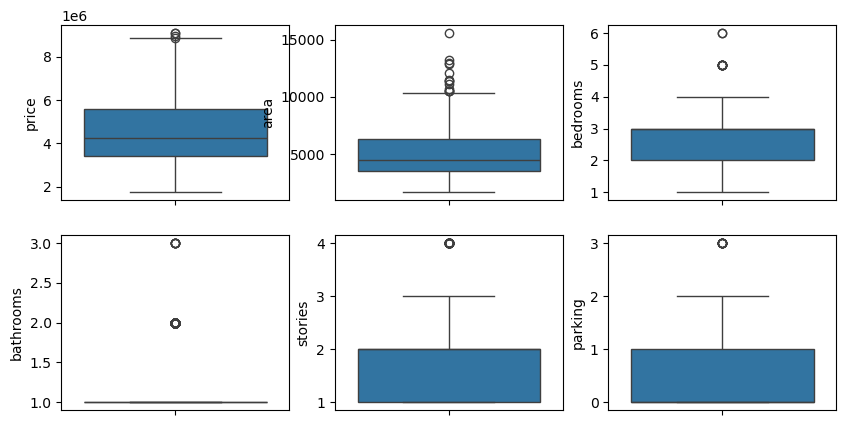

In [39]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.show()

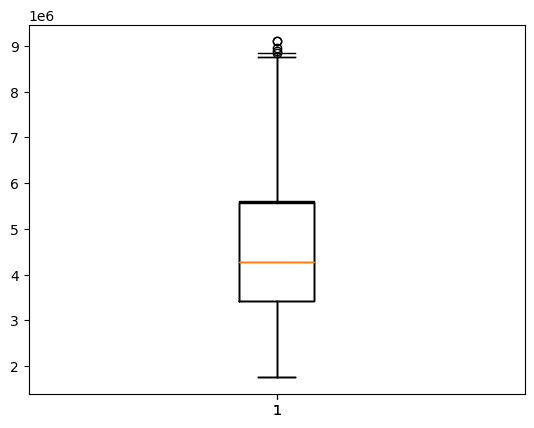

In [42]:
# outlier treatment for price
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.show()

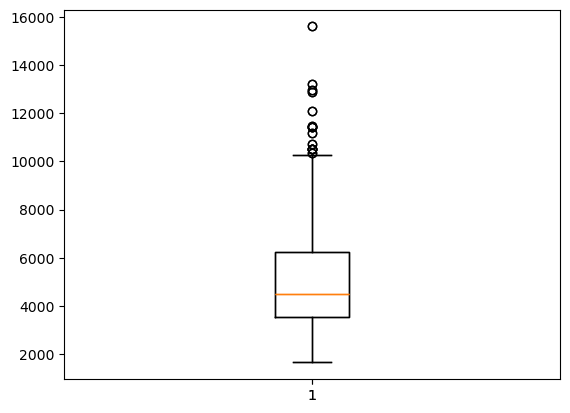

In [45]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.show()

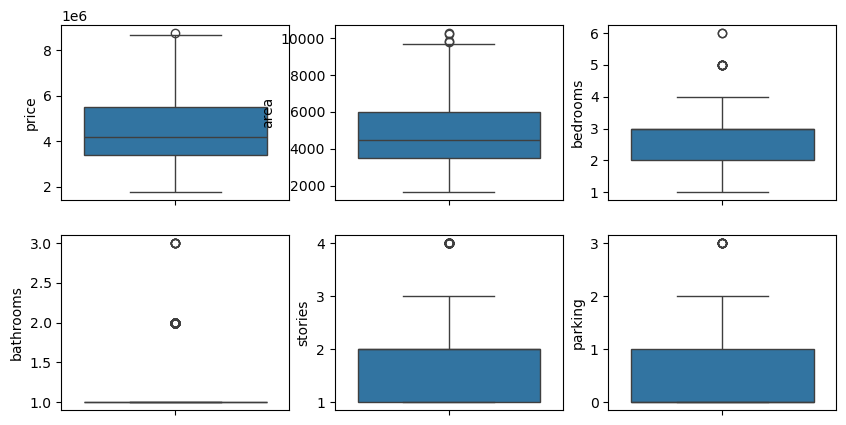

In [49]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.show()

#Visualising Numeric Variables
#Let's make a pairplot of all the numeric variables


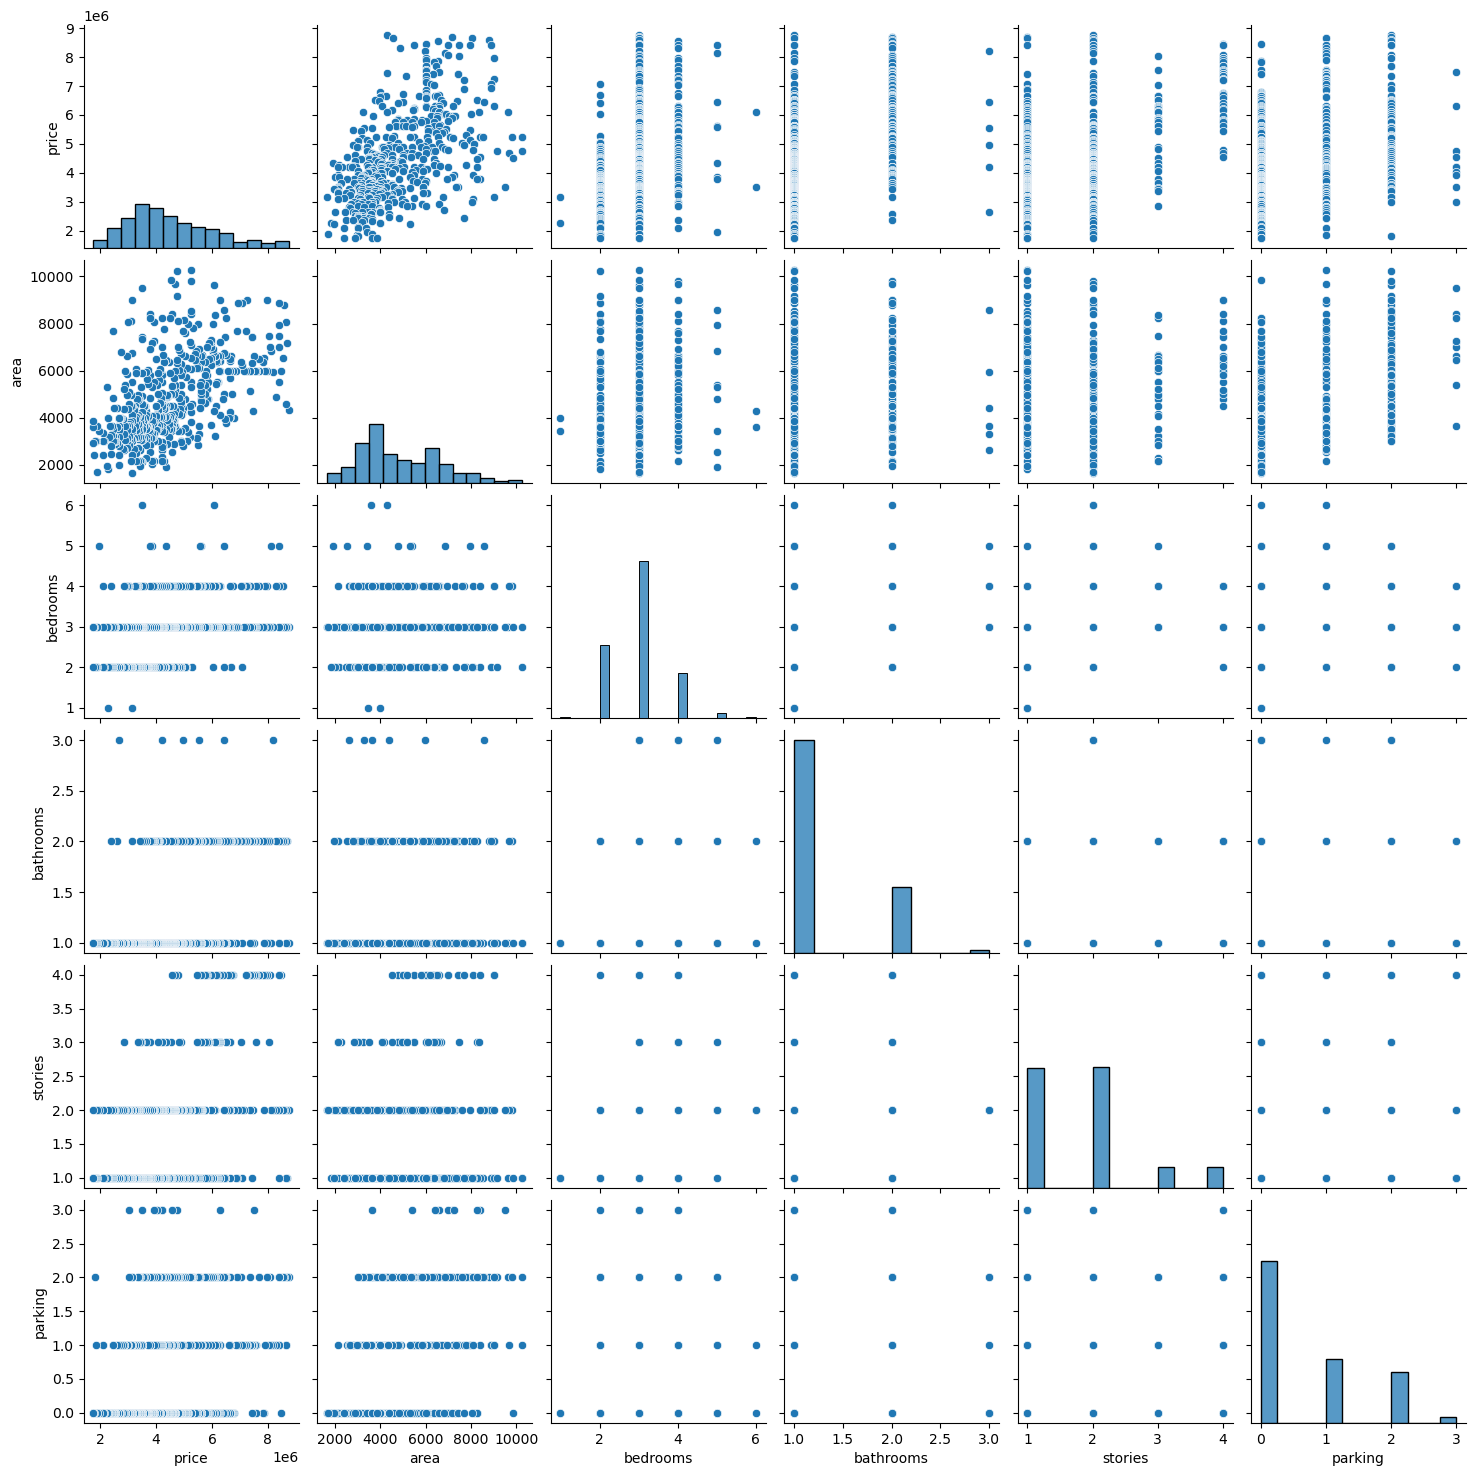

In [50]:
sns.pairplot(df)
plt.show()

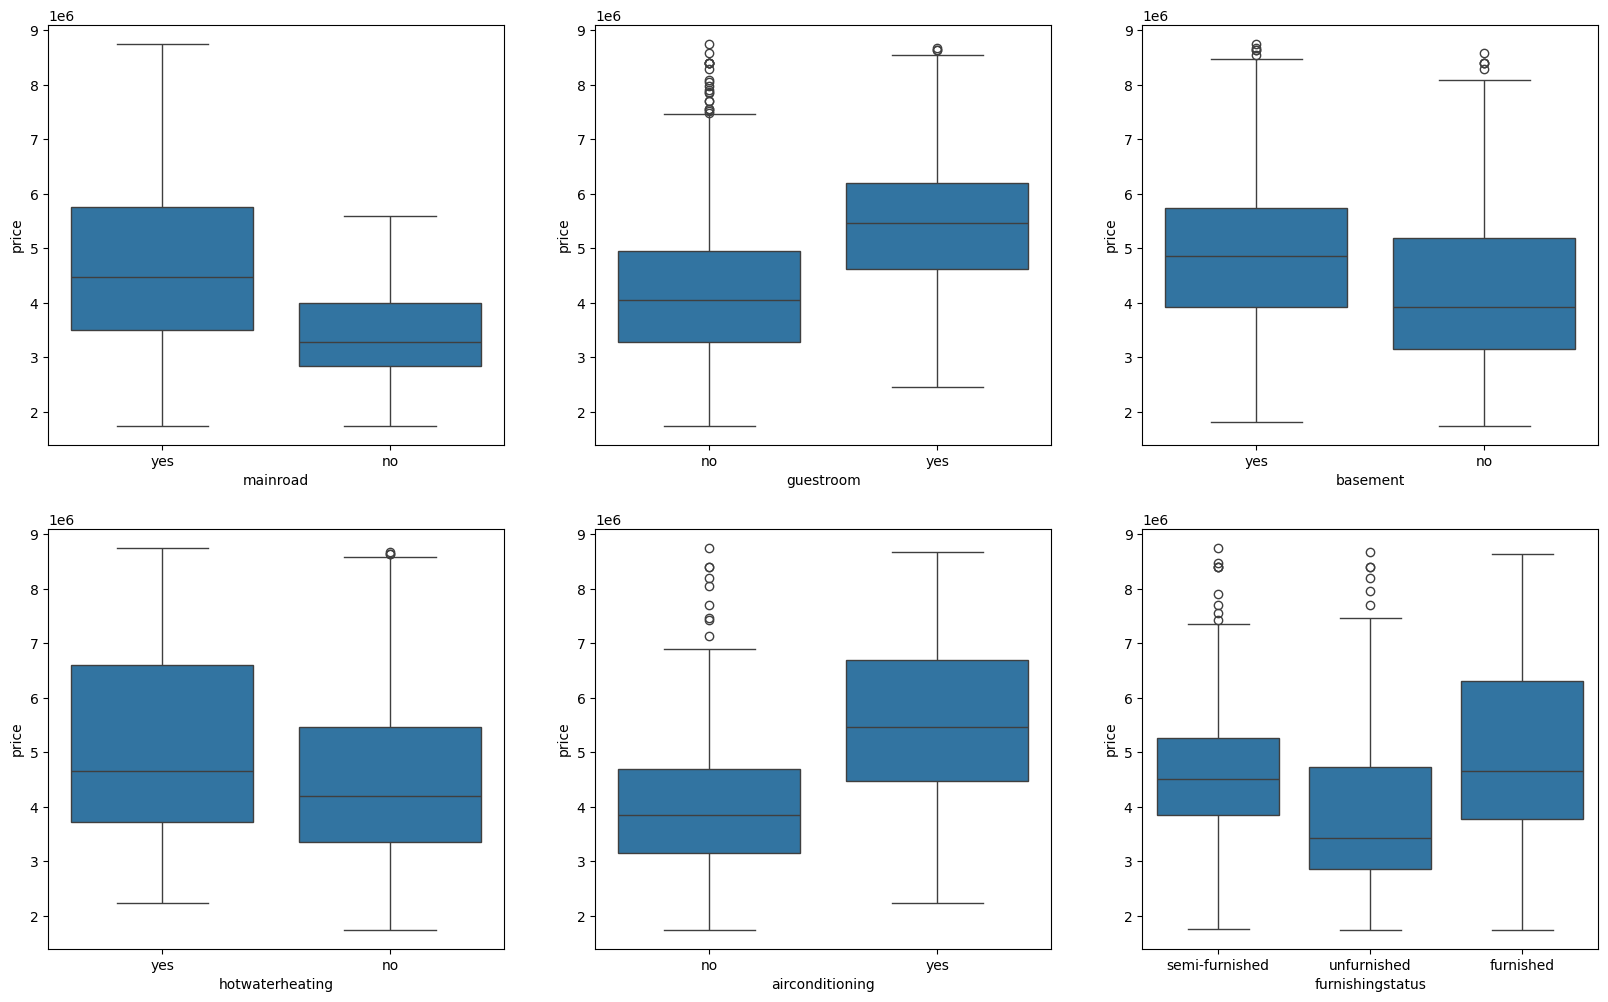

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()


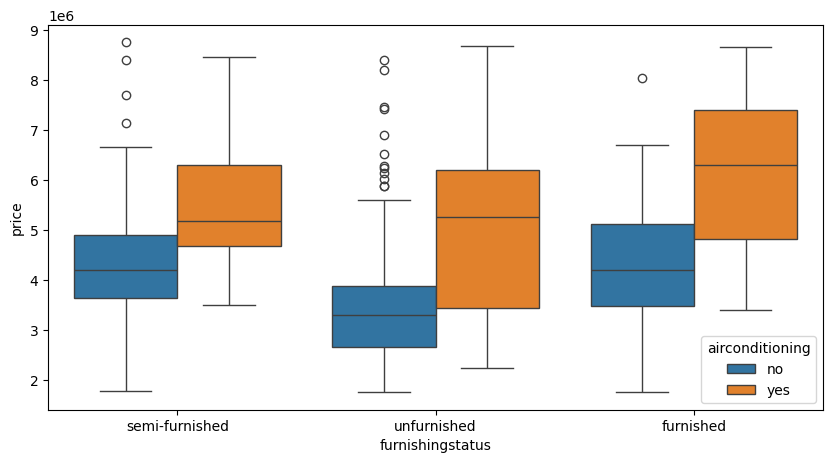

In [55]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

Data Preparation


In [57]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [59]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished


Dummy Variables

In [60]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'])

In [61]:
status.head()

,furnished,semi-furnished,unfurnished
20,False,True,False
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False


In [63]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [65]:
# Now let's see the head of our dataframe.

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished


In [67]:
# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [69]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
20,8750000,4320,3,1,2,1,0,1,1,0,2,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0


Splitting the Data into Training and Testing Sets

In [70]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [74]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
100,0.640,0.576251,0.25,0.5,0.000000,1,0,1,0,1,0.000000,1
487,0.160,0.436554,0.50,0.0,0.333333,1,0,0,0,0,0.000000,0
248,0.399,0.285215,0.00,0.5,0.000000,1,1,1,0,0,0.000000,0
109,0.620,0.577998,0.50,0.5,0.333333,1,1,0,1,0,0.333333,0
499,0.130,0.230501,0.25,1.0,0.333333,0,1,0,0,0,0.000000,0


In [75]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.391666,0.374467,0.238095,0.127451,0.265173,0.851541,0.182073,0.355742,0.042017,0.319328,0.220355,0.204482
std,0.216398,0.200460,0.186533,0.233747,0.287088,0.356054,0.386446,0.479410,0.200909,0.466871,0.284860,0.403889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230000,0.227008,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.331781,0.250000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.530000,0.506403,0.250000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


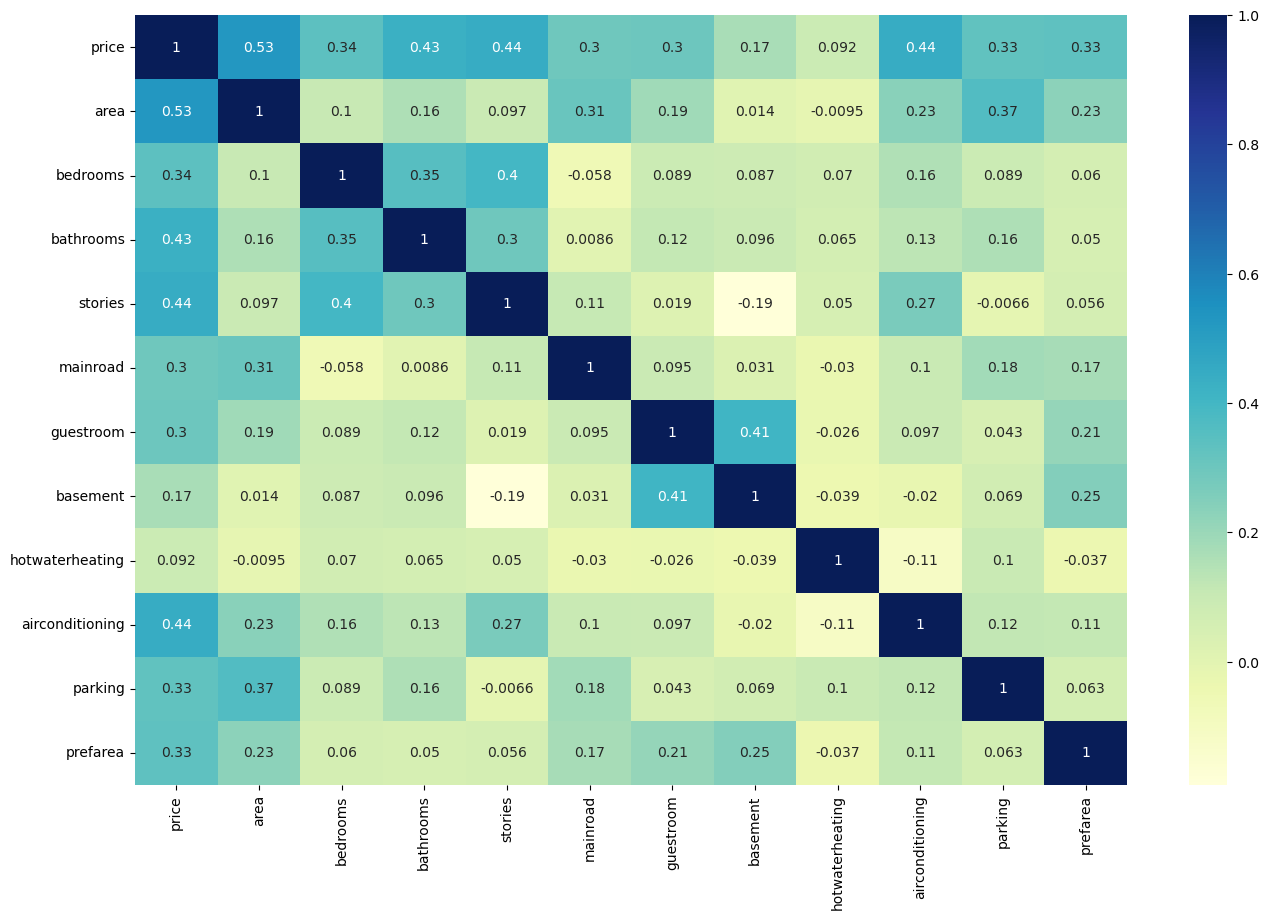

In [76]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [77]:
y_train = df_train.pop('price')
X_train = df_train

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [94]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)


In [100]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 4),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 3),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1)]

In [101]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning', 'prefarea'], dtype='object')

In [102]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking'], dtype='object')

In [103]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [104]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [105]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [106]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           8.72e-66
Time:                        22:35:34   Log-Likelihood:                 201.98
No. Observations:                 357   AIC:                            -390.0
Df Residuals:                     350   BIC:                            -362.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1024      0.017     

In [107]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.11
3,stories,1.17
5,airconditioning,1.15
1,area,1.13
2,bathrooms,1.12
6,prefarea,1.06
4,hotwaterheating,1.02


Residual Analysis of the train data

In [109]:
y_train_price = lm.predict(X_train_rfe)

In [110]:
res = (y_train_price - y_train)

In [111]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

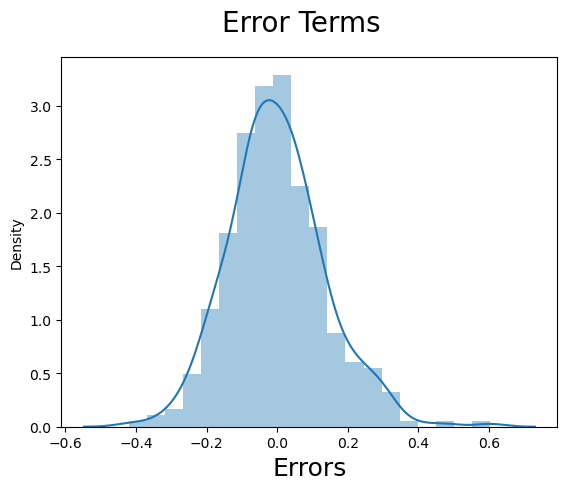

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

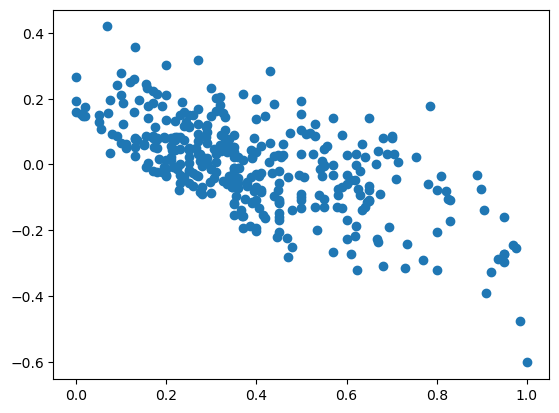

In [118]:
plt.scatter(y_train,res)
plt.show()

Model Evaluation

In [120]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [121]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [122]:
y_test = df_test.pop('price')
X_test = df_test

In [123]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [124]:
# Now let's use our model to make predictions.

In [125]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [126]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [127]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6114550544117661

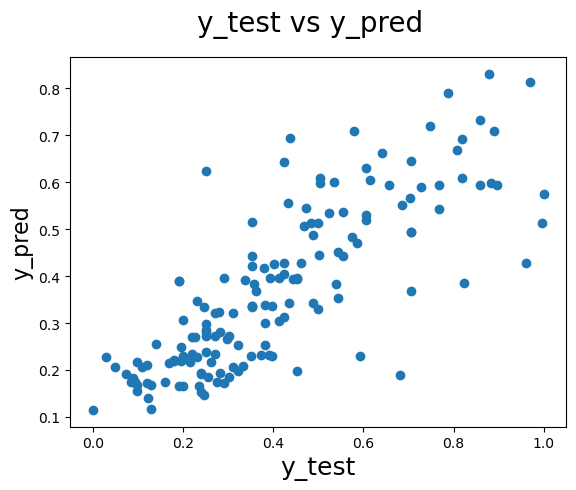

In [132]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   # Y-label

plt.show()

#We can see that the equation of our best fitted line is:

price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea